# Starting from the basics

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston

boston = load_boston()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

%matplotlib inline

mlab.normpdf is deprycated

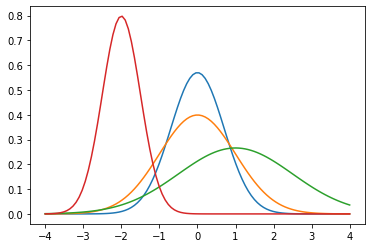

In [7]:
x=np.linspace(-4,4,100) 
for mean,variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    plt.plot(x, norm.pdf(x,mean,variance)) 
plt.show()

In [8]:
#inspired in R dataframe render data vectors
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### PDF probability density function

### Mean calculation
pandas DataFrame method

In [9]:
mean_expected_value = dataset['target'].mean()
mean_expected_value

22.532806324110698

NumPy method

In [10]:
np.mean(dataset['target'])

22.532806324110698

### The squared sum of errors
measuring the error produced in predicting the real y values.

In [11]:
squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
SSE = np.sum(squared_errors)
print('Sum of Squared Errors SSE: %01.f'% SSE)

Sum of Squared Errors SSE: 42716


#### Distribution of errors
plot shows  how frequent certain errors are in respect to their values, there is a high density around 0

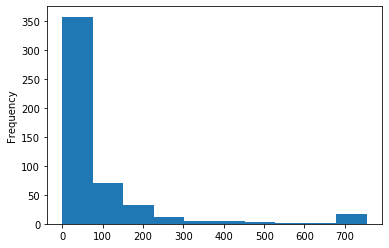

In [12]:
density_plot = squared_errors.plot(kind='hist')

#### The formula for standardizing a variable is as follows:

In [13]:
def standardize(x):
    return (x-np.mean(x)/np.std(x))

### Pearson correlation

In [14]:
            
def covariance(variable_1, variable_2, bias=0):
        observations = float(len(variable_1))
        return np.sum((variable_1 - np.mean(variable_1)) *(variable_2 - np.mean(variable_2))) / (observations-min(bias,1))
    
def standardize(variable):
        return  (variable-np.mean(variable)) / np.std(variable)
    
def correlation(var1,var2,bias=0):
        return covariance(standardize(var1), standardize(var2),bias)


from scipy.stats.stats import pearsonr
print ('Our correlation estimation %0.5f' % (correlation(dataset['RM'],dataset['target'] ) ) )
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0] )

Our correlation estimation 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


#### Way to estimate if a correlation is relevant or not.

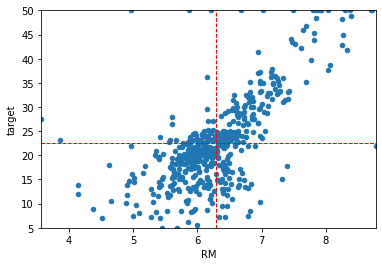

In [15]:
# 
x_range = [ dataset['RM'].min(), dataset['RM'].max()]
y_range = [ dataset['target'].min(), dataset['target'].max() ]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim= y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1 )
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='red', linewidth=1 )

# Regression with statsmodels

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [17]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

C:\Users\Cidones\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


#### At this point, we just need to set the initialization of the linear regression calculation: 

In [19]:
linear_regression = sm.OLS(y,X) 

#### Estimation of the regression coefficients, the β - Beta vector

In [20]:
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        16:41:39   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print(fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


# The	coefficient	of	determination

Calculate the sum of squared errors of the mean of the target variable.

In [22]:
mean_sum_squared_errors = np.sum((dataset['target'] - dataset['target'].mean())**2)
regr_sum_squared_errors = np.sum((dataset['target'] - fitted_values)**2)
(mean_sum_squared_errors - regr_sum_squared_errors) / mean_sum_squared_errors

0.4835254559913341

 R-squared correlation 

In [23]:
(pearsonr(dataset['RM'], dataset['target'])[0])**2

0.4835254559913339

In [24]:
#Replace Betas and X with the estimated coefficients
#Avg number of rooms xRM 4.55
9.1021*4.55-34.6706

6.743955

In [25]:
#if we increase the variable by one unit
9.1021*5.55-34.6706

15.846055

In [26]:
(np.min(dataset['RM']), np.max(dataset['RM']))

(3.561, 8.78)

#### Compute the residuals 

In [27]:
residuals  = dataset['target'] - fitted_values
normalized_residuals = standardize(residuals)

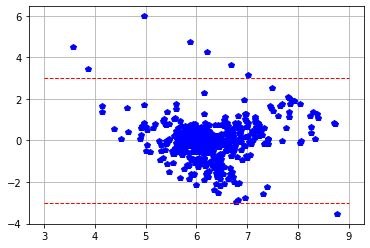

In [28]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals, 'bp')
upper_bond = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3,3], '--', color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color='red', linewidth=1)
plt.grid()

## Predicting with a regression model

Using predict method and fitted model:

In [29]:
RM = 5
Xp = np.array([1,RM])
print("Our model predicts if RM = %01.f the answer value is %0.1f"%(RM, fitted_model.predict(Xp)) )

Our model predicts if RM = 5 the answer value is 10.8


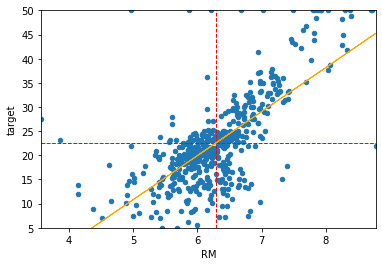

In [30]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY=scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1)
meanX=scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()],y_range, '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(dataset['RM'], fitted_values, '-', color='orange', linewidth=1)

### Dot function Numpy to predict the method

In [31]:
predictions_by_dot_product = np.dot(X, betas)
print("Using the prediction method: %s" % fitted_values[:10])
print("Using betas and the dot product: %s" % predictions_by_dot_product[:10])

Using the prediction method: 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Using betas and the dot product: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


## Regressing with scikit-learn

In [32]:
from sklearn import linear_model

In [33]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [34]:
observations = len(dataset)

#X should be always a matrix , never a vector
X = dataset['RM'].values.reshape((observations, 1))

#y can be vector
y= dataset['target'].values

In [35]:
#fit the model
linear_regression.fit(X,y)
print(linear_regression.coef_)
print(linear_regression.intercept_)

[9.10210898]
-34.67062077643857


In [36]:
#use predict method and slicing 10 first
print(linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [37]:
#new matrix and add new constant, simple matrix-vector multiplication
Xp= np.column_stack((X,np.ones(observations)))
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]
np.dot(Xp, v_coef)[:10]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

#### Check performance of the two versions of linear Regression :

In [38]:
from sklearn.datasets import make_regression

In [39]:
HX, Hy = make_regression(n_samples=10000000, n_features=1, n_targets=1, random_state=101)

In [40]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX, Hy)

Wall time: 624 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

Wall time: 2.38 s


#### Explaning squared errors

In [42]:
import numpy as np

In [43]:
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

def squared_cost(v, e):
    return np.sum((v-e)**2)

In [44]:
from scipy import optimize as o

#few changes in order to use fmin need to import optimize

xopt = o.fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [45]:
print('The result of optmization is %0.1f' % (xopt[0]))
print('The mean is %0.1f' % (np.mean(x)))

The result of optmization is 7.8
The mean is 7.8


In [46]:
#What minimizes the sum of absolute errors
def absolute_cost(v,e):
    return np.sum(np.abs(v-e))

xopt = o.fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [47]:
print('The result of optmization is %0.1f' % (xopt[0]))
print('The mean is %0.1f' % (np.median(x)))

The result of optmization is 8.0
The mean is 8.0


### OPTIMIZATION METHODS 

In [52]:
#np.linalg.solve 
observations = len(dataset)
#  X should be always a matrix, never a vector
x = dataset['RM'].values.reshape((observations, 1)) 
#We add the bias 
Xb = np.column_stack((X, np.ones(observations)))
y = dataset['target'].values

def matrix_inverse(X, y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X) ), np.dot(X.T, y) )
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X) ), np.dot(X.T, y) )

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y) )

print(matrix_inverse(Xb, y))
print(matrix_inverse(Xb, y, pseudo=True))
print(normal_equations(Xb, y))


[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


### Gradient descent at Work